# Práctico 1 - Procesamiento Digital de Imágenes

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

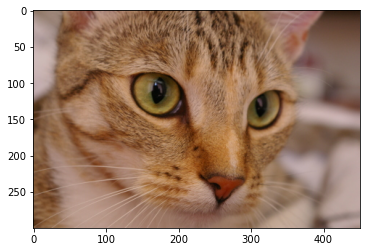

In [4]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:chelsea.png')/255

# Mostrar la imagen
plt.imshow(img_rgb)

## Seleccionar el canal rojo

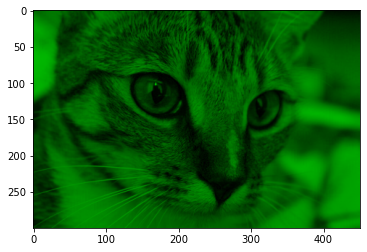

In [21]:
M = np.array([[0, 0, 0], 
              [0, 0, 1], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M)

plt.imshow(img_canal_rojo)



## Imagen en escala de grises

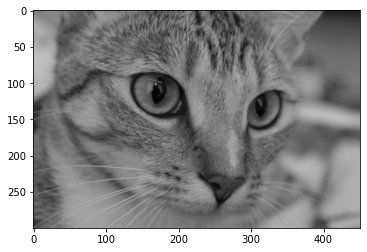

In [144]:
M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

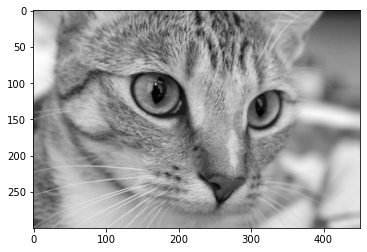

In [58]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

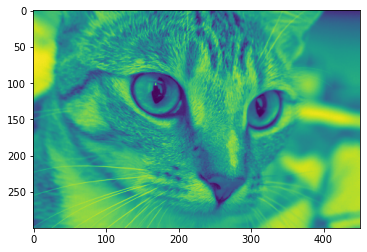

In [145]:
plt.imshow(img_gris_2)

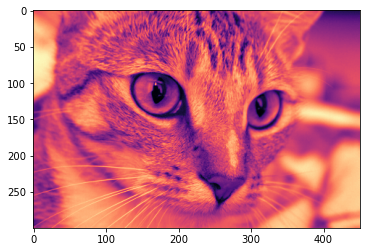

In [146]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.57310022 0.08974264 0.20604649]
 [0.53997415 0.36003631 0.65207196]
 [0.80380023 0.8342356  0.21697801]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

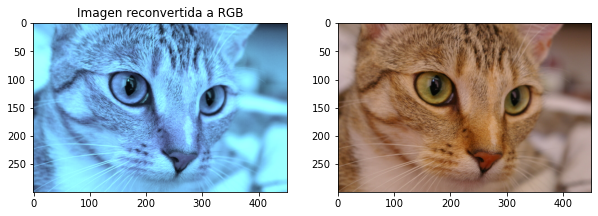

In [58]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

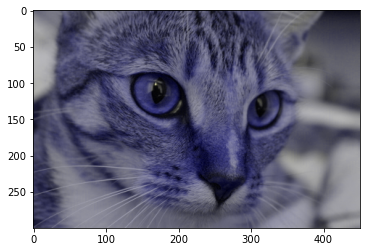

In [59]:
M = np.array([[0, 0, 1],
             [0, 0, 1],
             [0, 1, 0]])
img_bgr = apply_matrix(img_rgb, M)

plt.imshow(img_bgr)



## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

Text(0.5, 1.0, 'Imagen procesada')

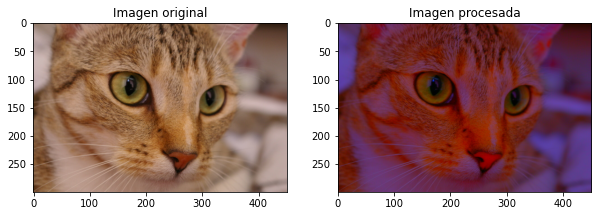

In [64]:
#primera manera, con matrices

M = np.array([[0.299, 0.595716, 0.211456], 
              [0.587, -0.274453, -0.522591], 
              [0.114, -0.321263, 0.311135]])

img_yiq = apply_matrix(img_rgb, M)

alpha = 0.5
beta = 2

G = np.array([[alpha, 0, 0], 
              [0, beta, 0], 
              [0, 0, beta]])

img_alpha_beta = apply_matrix(img_yiq, G)

L = np.array([[1, 1, 1], 
              [0.9663, -0.2721, -1.1070], 
              [0.6210, -0.6474, 1.7046]])

img_rgb_edit = apply_matrix(img_alpha_beta , L)

#print(img_alpha_beta)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen original')
axes[1].imshow(np.clip(img_rgb_edit, 0, 1))
axes[1].set_title('Imagen procesada')


Text(0.5, 1.0, 'Imagen procesada')

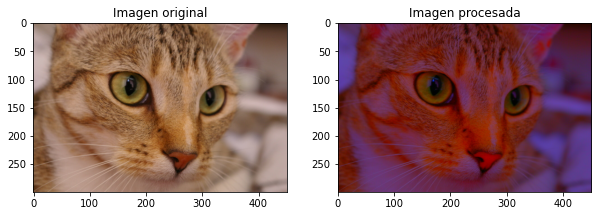

In [66]:
#Lo hago de una segunda manera multiplicando cada canal por alpha y beta.

M = np.array([[0.299, 0.595716, 0.211456], 
              [0.587, -0.274453, -0.522591], 
              [0.114, -0.321263, 0.311135]])

img_yiq = apply_matrix(img_rgb, M)

alpha = 0.5
beta = 2

#multiplico cada canal por alpha y beta
img_yiq[:,:,0] = alpha * img_yiq[:,:,0]
img_yiq[:,:,1] = beta * img_yiq[:,:,1]
img_yiq[:,:,2] = beta * img_yiq[:,:,2]

#matriz inversa
M_inv = np.linalg.inv(M)

#paso a bgr
img_rgb_procesada = apply_matrix(img_yiq, M_inv)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen original')
axes[1].imshow(np.clip(img_rgb_procesada, 0, 1))
axes[1].set_title('Imagen procesada')


## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


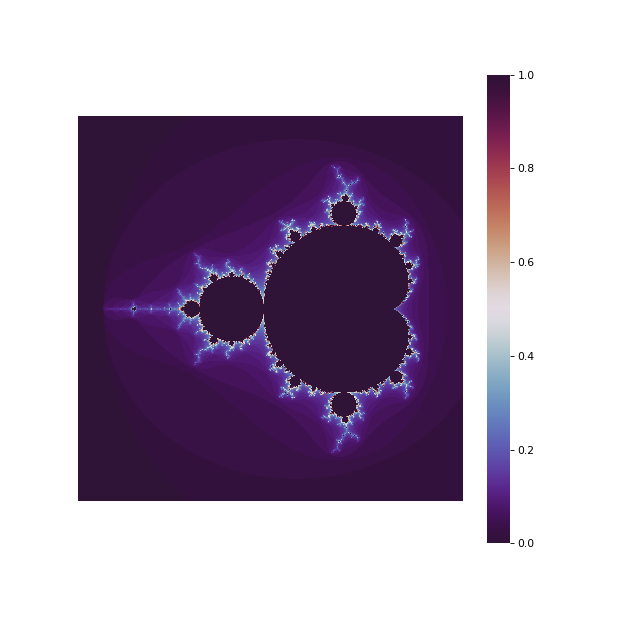

<AxesSubplot:>

In [68]:
import seaborn as sns
%matplotlib notebook

x = np.load('mandelbrot.npy')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='twilight_shifted', square=True, xticklabels=False, yticklabels=False)